In [2]:
!pip install librosa

  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23154 sha256=2ce21ae20b97f0abba499bbb3d3633b909213ad4ed4f9f609a1fab655886147d
  Stored in directory: c:\users\conne\appdata\local\pip\cache\wheels\a2\a3\bd\ec1568ce7515115a11ab686d509ad302124c782af065de47ee
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320731 sha256=49b6c9ec207de187057d695ae40f7d0b853a1a2ab2c5d26087893e6067b83d1a
  Stored in directory: c:\users\conne\appdata\local\pip\cache\wheels\86\2c\7d\46a32a246b0e5939cea2c5ec1492164073e0c5d16d666ae2cd
Successfully built audioread resampy


In [1]:
# importing necessary libraries and dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import librosa.display
import matplotlib.pyplot as plt
import subprocess
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('cough_trial_extended.csv')

In [3]:
df.head()

,file_properties,class
0,0v8MGxNetjg_ 10.000_ 20.000.wav,not_covid
1,1j1duoxdxBg_ 70.000_ 80.000.wav,not_covid
2,1MSYO4wgiag_ 120.000_ 130.000.wav,not_covid
3,1PajbAKd8Kg_ 0.000_ 10.000.wav,not_covid
4,cov1.wav,covid


In [5]:
cough_df = df

<AxesSubplot:>

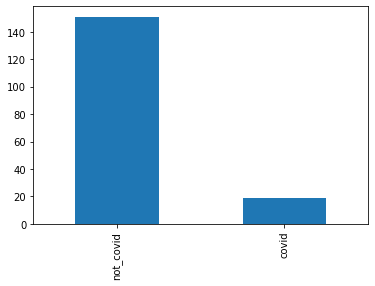

In [6]:
cough_df['class'].value_counts().plot.bar()

In [7]:
cough_df.isnull().sum()

file_properties    0
class              0
dtype: int64

In [14]:
data_base_dir = r'trial_covid/'
def extract_features_from_audio(audio_path):
    # setting path
    file_name = os.path.join(data_base_dir,audio_path)
    # check if the file is corrupted
    try:
        # here kaiser_fast is a technique used for faster extraction
        # X-> audio_time_series_data; sample_rate-> sampling rate
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        
        # extraccting Mel-Frequeny Cepstral Coeficients feature from data
        # y -> accepts time-series audio data; sr -> accepts sampling rate
        # n_mfccs -> no. of MFCCs to return
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis = 0)
    except Exception as e:
        print("Error encountered while parsing file: ", e)
        return None, None
    # store mfccs features
    feature = mfccs
    
    return feature

In [15]:
%%time
cough_df['feature'] = cough_df['file_properties'].apply(extract_features_from_audio)


Wall time: 4.86 s


In [17]:
X = cough_df['feature']
y = cough_df['class']

# Label Encoding the audio data
lb = LabelEncoder()

# converting pd.series into np.array for faster processing
X = np.array(X.tolist())
y = np.array(y.tolist())


y = to_categorical(lb.fit_transform(y))

In [18]:
len(X),len(y)

(170, 170)

In [41]:
X.shape

(170, 40)

In [20]:
len(X[0])

40

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=40)

In [22]:
num_labels = y.shape[1]
filter_size = 2

def categorical_classifier():
    model = Sequential()

    # input and first hidden layer
    model.add(Dense(input_shape=(40,), units=256, activation='relu', kernel_initializer='uniform'))
    model.add(Dropout(0.5))

    # second hidden layer
    model.add(Dense(units=256,activation='relu',kernel_initializer='uniform'))
    model.add(Dropout(0.5))

    # output layer
    model.add(Dense(units=num_labels, activation='softmax'))

    # compiling our model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

    # training the data
    #model.fit(X,y, batch_size=32, epochs=500, validation_split=0.3)
    return model

In [23]:
model = categorical_classifier()

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 76,802
Trainable params: 76,802
Non-trainable params: 0
_________________________________________________________________


In [25]:
%%time
history = model.fit(x_train,y_train, batch_size=16, epochs=500, validation_data=(x_test, y_test))

Epoch 1/650
8/8 [==============================] - 0s 19ms/step - loss: 2.6704 - accuracy: 0.7983 - val_loss: 1.1445 - val_accuracy: 0.9020
Epoch 2/650
8/8 [==============================] - 0s 4ms/step - loss: 2.3273 - accuracy: 0.7143 - val_loss: 0.3019 - val_accuracy: 0.9020
Epoch 3/650
8/8 [==============================] - 0s 4ms/step - loss: 1.5247 - accuracy: 0.8151 - val_loss: 0.4003 - val_accuracy: 0.9020
Epoch 4/650
8/8 [==============================] - 0s 4ms/step - loss: 1.0217 - accuracy: 0.8235 - val_loss: 0.2530 - val_accuracy: 0.9216
Epoch 5/650
8/8 [==============================] - 0s 4ms/step - loss: 1.0742 - accuracy: 0.8739 - val_loss: 0.5866 - val_accuracy: 0.9020
Epoch 6/650
8/8 [==============================] - 0s 4ms/step - loss: 0.9156 - accuracy: 0.8824 - val_loss: 0.3370 - val_accuracy: 0.8235
Epoch 7/650
8/8 [==============================] - 0s 4ms/step - loss: 0.8714 - accuracy: 0.8067 - val_loss: 0.2803 - val_accuracy: 0.9216
Epoch 8/650
8/8 [=========

8/8 [==============================] - 0s 4ms/step - loss: 0.0434 - accuracy: 0.9916 - val_loss: 0.1691 - val_accuracy: 0.9412
Epoch 60/650
8/8 [==============================] - 0s 4ms/step - loss: 0.0821 - accuracy: 0.9832 - val_loss: 0.1508 - val_accuracy: 0.9608
Epoch 61/650
8/8 [==============================] - 0s 4ms/step - loss: 0.0805 - accuracy: 0.9580 - val_loss: 0.1701 - val_accuracy: 0.9412
Epoch 62/650
8/8 [==============================] - 0s 4ms/step - loss: 0.0561 - accuracy: 0.9748 - val_loss: 0.2026 - val_accuracy: 0.9412
Epoch 63/650
8/8 [==============================] - 0s 4ms/step - loss: 0.0708 - accuracy: 0.9748 - val_loss: 0.1452 - val_accuracy: 0.9608
Epoch 64/650
8/8 [==============================] - 0s 4ms/step - loss: 0.0424 - accuracy: 0.9832 - val_loss: 0.1621 - val_accuracy: 0.9608
Epoch 65/650
8/8 [==============================] - 0s 4ms/step - loss: 0.0858 - accuracy: 0.9832 - val_loss: 0.1485 - val_accuracy: 0.9412
Epoch 66/650
8/8 [===============

8/8 [==============================] - 0s 7ms/step - loss: 0.0471 - accuracy: 0.9832 - val_loss: 0.1922 - val_accuracy: 0.9412
Epoch 118/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0544 - accuracy: 0.9832 - val_loss: 0.2234 - val_accuracy: 0.9216
Epoch 119/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 0.2057 - val_accuracy: 0.9216
Epoch 120/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0245 - accuracy: 1.0000 - val_loss: 0.2021 - val_accuracy: 0.9608
Epoch 121/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 0.1933 - val_accuracy: 0.9608
Epoch 122/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0395 - accuracy: 0.9832 - val_loss: 0.1964 - val_accuracy: 0.9608
Epoch 123/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0205 - accuracy: 0.9916 - val_loss: 0.2550 - val_accuracy: 0.9412
Epoch 124/650
8/8 [========

8/8 [==============================] - 0s 6ms/step - loss: 0.0233 - accuracy: 0.9916 - val_loss: 0.2678 - val_accuracy: 0.9608
Epoch 176/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0288 - accuracy: 0.9832 - val_loss: 0.2710 - val_accuracy: 0.9216
Epoch 177/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 0.2680 - val_accuracy: 0.9216
Epoch 178/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0462 - accuracy: 0.9916 - val_loss: 0.2353 - val_accuracy: 0.9412
Epoch 179/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0114 - accuracy: 0.9916 - val_loss: 0.2341 - val_accuracy: 0.9412
Epoch 180/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.2295 - val_accuracy: 0.9412
Epoch 181/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.1825 - val_accuracy: 0.9608
Epoch 182/650
8/8 [========

8/8 [==============================] - 0s 7ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.2593 - val_accuracy: 0.9412
Epoch 234/650
8/8 [==============================] - 0s 8ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.2959 - val_accuracy: 0.9412
Epoch 235/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0479 - accuracy: 0.9832 - val_loss: 0.1262 - val_accuracy: 0.9608
Epoch 236/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0205 - accuracy: 0.9832 - val_loss: 0.1068 - val_accuracy: 0.9608
Epoch 237/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0430 - accuracy: 0.9832 - val_loss: 0.1839 - val_accuracy: 0.9608
Epoch 238/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0433 - accuracy: 0.9916 - val_loss: 0.1873 - val_accuracy: 0.9608
Epoch 239/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0299 - accuracy: 0.9916 - val_loss: 0.1630 - val_accuracy: 0.9608
Epoch 240/650
8/8 [========

8/8 [==============================] - 0s 7ms/step - loss: 0.0289 - accuracy: 0.9916 - val_loss: 0.2857 - val_accuracy: 0.9412
Epoch 292/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0430 - accuracy: 0.9748 - val_loss: 0.2486 - val_accuracy: 0.9216
Epoch 293/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0486 - accuracy: 0.9916 - val_loss: 0.3306 - val_accuracy: 0.9412
Epoch 294/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0316 - accuracy: 0.9916 - val_loss: 0.2686 - val_accuracy: 0.9412
Epoch 295/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0241 - accuracy: 0.9916 - val_loss: 0.2905 - val_accuracy: 0.9412
Epoch 296/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0131 - accuracy: 0.9916 - val_loss: 0.2619 - val_accuracy: 0.9412
Epoch 297/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.2170 - val_accuracy: 0.9608
Epoch 298/650
8/8 [========

8/8 [==============================] - 0s 7ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.4529 - val_accuracy: 0.9216
Epoch 350/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.5222 - val_accuracy: 0.9216
Epoch 351/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.5670 - val_accuracy: 0.9412
Epoch 352/650
8/8 [==============================] - 0s 6ms/step - loss: 2.3020e-04 - accuracy: 1.0000 - val_loss: 0.5779 - val_accuracy: 0.9412
Epoch 353/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.5298 - val_accuracy: 0.9216
Epoch 354/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.5703 - val_accuracy: 0.9412
Epoch 355/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.6370 - val_accuracy: 0.9412
Epoch 356/650
8/8 [====

8/8 [==============================] - 0s 7ms/step - loss: 0.0079 - accuracy: 0.9916 - val_loss: 0.3874 - val_accuracy: 0.9608
Epoch 408/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.4090 - val_accuracy: 0.9608
Epoch 409/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0287 - accuracy: 0.9832 - val_loss: 0.3723 - val_accuracy: 0.9608
Epoch 410/650
8/8 [==============================] - 0s 7ms/step - loss: 0.1545 - accuracy: 0.9748 - val_loss: 0.4580 - val_accuracy: 0.9608
Epoch 411/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0439 - accuracy: 0.9748 - val_loss: 0.3154 - val_accuracy: 0.9804
Epoch 412/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0088 - accuracy: 0.9916 - val_loss: 0.3056 - val_accuracy: 0.9804
Epoch 413/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0331 - accuracy: 0.9916 - val_loss: 0.2046 - val_accuracy: 0.9804
Epoch 414/650
8/8 [========

8/8 [==============================] - 0s 7ms/step - loss: 0.0699 - accuracy: 0.9832 - val_loss: 0.4611 - val_accuracy: 0.9608
Epoch 466/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0631 - accuracy: 0.9832 - val_loss: 0.4649 - val_accuracy: 0.9608
Epoch 467/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0289 - accuracy: 0.9916 - val_loss: 0.3561 - val_accuracy: 0.9608
Epoch 468/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0202 - accuracy: 0.9916 - val_loss: 0.3322 - val_accuracy: 0.9608
Epoch 469/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0113 - accuracy: 0.9916 - val_loss: 0.3406 - val_accuracy: 0.9608
Epoch 470/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.4429 - val_accuracy: 0.9608
Epoch 471/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.4672 - val_accuracy: 0.9608
Epoch 472/650
8/8 [========

8/8 [==============================] - 0s 7ms/step - loss: 0.0151 - accuracy: 0.9916 - val_loss: 0.2876 - val_accuracy: 0.9804
Epoch 524/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3008 - val_accuracy: 0.9804
Epoch 525/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0123 - accuracy: 0.9916 - val_loss: 0.2851 - val_accuracy: 0.9804
Epoch 526/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.3540 - val_accuracy: 0.9804
Epoch 527/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0375 - accuracy: 0.9916 - val_loss: 0.4724 - val_accuracy: 0.9608
Epoch 528/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0198 - accuracy: 0.9832 - val_loss: 0.6630 - val_accuracy: 0.9412
Epoch 529/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.6240 - val_accuracy: 0.9412
Epoch 530/650
8/8 [========

8/8 [==============================] - 0s 6ms/step - loss: 0.0161 - accuracy: 0.9916 - val_loss: 0.6469 - val_accuracy: 0.9412
Epoch 582/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0230 - accuracy: 0.9916 - val_loss: 0.6925 - val_accuracy: 0.9412
Epoch 583/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.6867 - val_accuracy: 0.9412
Epoch 584/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.6816 - val_accuracy: 0.9412
Epoch 585/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.6577 - val_accuracy: 0.9412
Epoch 586/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0639 - accuracy: 0.9832 - val_loss: 0.6483 - val_accuracy: 0.9412
Epoch 587/650
8/8 [==============================] - 0s 7ms/step - loss: 0.0171 - accuracy: 0.9916 - val_loss: 0.7886 - val_accuracy: 0.9412
Epoch 588/650
8/8 [========

8/8 [==============================] - 0s 8ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.7795 - val_accuracy: 0.9412
Epoch 640/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.7705 - val_accuracy: 0.9412
Epoch 641/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0258 - accuracy: 0.9916 - val_loss: 0.7540 - val_accuracy: 0.9412
Epoch 642/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.7836 - val_accuracy: 0.9412
Epoch 643/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.7923 - val_accuracy: 0.9412
Epoch 644/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.7574 - val_accuracy: 0.9412
Epoch 645/650
8/8 [==============================] - 0s 6ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.7113 - val_accuracy: 0.9608
Epoch 646/650
8/8 [========

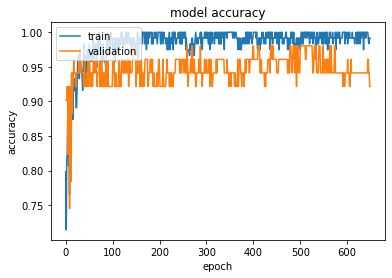

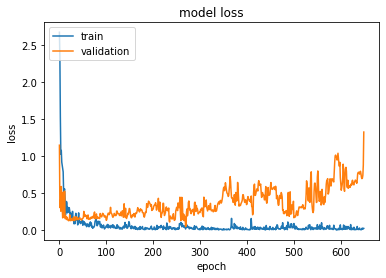

In [26]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [27]:
model.save('covid-cough-model-100acc.h5')